## Task: Mean, Median, Mode of Sepal Length

In [11]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load iris dataset
iris = load_iris(as_frame=True)
df = iris.frame
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### We loaded the classic Iris dataset, which contains measurements of sepal length, sepal width, petal length, and petal width for three iris species. This dataset is widely used in statistics and machine learning. The .head() function displays the first five rows so we can understand its structure

## Task: Variance & Std of Petal Width

In [13]:
mean_sepal_length = df['sepal length (cm)'].mean()
median_sepal_length = df['sepal length (cm)'].median()
mode_sepal_length = df['sepal length (cm)'].mode()[0]

mean_sepal_length, median_sepal_length, mode_sepal_length

(np.float64(5.843333333333334), np.float64(5.8), np.float64(5.0))

#### The mean represents the average sepal length, the median shows the middle value, and the mode highlights the most frequent measurement. If mean and median are close, the data is fairly symmetric. A difference between them would suggest skewness in sepal lengths.

## Task: Summary Stats Table

In [14]:
variance_petal_width = df['petal width (cm)'].var()
std_petal_width = df['petal width (cm)'].std()

variance_petal_width, std_petal_width

(np.float64(0.5810062639821029), np.float64(0.7622376689603465))

#### Variance measures how spread out the petal widths are from the mean. Standard deviation is its square root, showing the average distance of values from the mean in the same units. A higher standard deviation means more variability among petal widths.

## Task: Summary Statistics

In [15]:
summary_stats = pd.DataFrame({
    "mean": df.mean(),
    "median": df.median(),
    "variance": df.var(),
    "std_dev": df.std()
})
summary_stats

,mean,median,variance,std_dev
sepal length (cm),5.843333,5.80,0.685694,0.828066
sepal width (cm),3.057333,3.00,0.189979,0.435866
petal length (cm),3.758000,4.35,3.116278,1.765298
petal width (cm),1.199333,1.30,0.581006,0.762238
target,1.000000,1.00,0.671141,0.819232


#### This table summarizes central tendency (mean, median) and spread (variance, std) for all four features. Comparing these values allows us to see which features have larger variability. For example, petal length generally shows more spread than sepal width.

## Task: Probability Distribution of Sepal Length

In [16]:
sepal_length = df['sepal length (cm)']
prob_dist = sepal_length.value_counts(normalize=True).sort_index()
prob_dist

sepal length (cm)
4.3    0.006667
4.4    0.020000
4.5    0.006667
4.6    0.026667
4.7    0.013333
4.8    0.033333
4.9    0.040000
5.0    0.066667
5.1    0.060000
5.2    0.026667
5.3    0.006667
5.4    0.040000
5.5    0.046667
5.6    0.040000
5.7    0.053333
5.8    0.046667
5.9    0.020000
6.0    0.040000
6.1    0.040000
6.2    0.026667
6.3    0.060000
6.4    0.046667
6.5    0.033333
6.6    0.013333
6.7    0.053333
6.8    0.020000
6.9    0.026667
7.0    0.006667
7.1    0.006667
7.2    0.020000
7.3    0.006667
7.4    0.006667
7.6    0.006667
7.7    0.026667
7.9    0.006667
Name: proportion, dtype: float64

#### The probability distribution shows the likelihood of each unique sepal length occurring in the dataset. Values are normalized to sum up to 1, meaning each number represents the fraction of flowers with that specific sepal length.

## Task: Histogram of Sepal Lengths

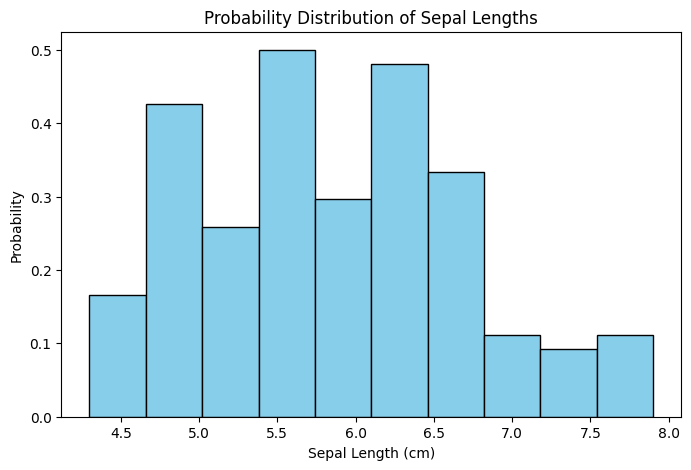

In [17]:
plt.figure(figsize=(8,5))
plt.hist(sepal_length, bins=10, density=True, color='skyblue', edgecolor='black')
plt.title("Probability Distribution of Sepal Lengths")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Probability")
plt.show()

#### The histogram visualizes how sepal lengths are distributed. Taller bars mean more flowers fall within that length range. The overall shape can suggest normality, skewness, or concentration of values. This helps us see patterns at a glance.

## Task: CDF of Petal Lengths

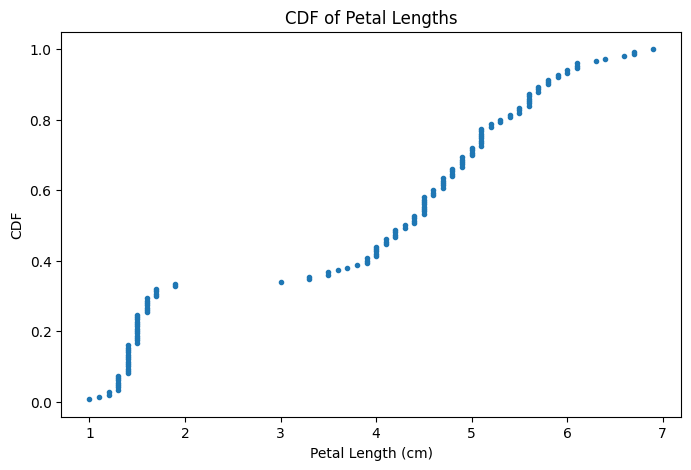

In [18]:
petal_length = df['petal length (cm)']
sorted_data = np.sort(petal_length)
cdf = np.arange(1, len(sorted_data)+1) / len(sorted_data)

plt.figure(figsize=(8,5))
plt.plot(sorted_data, cdf, marker=".", linestyle="none")
plt.title("CDF of Petal Lengths")
plt.xlabel("Petal Length (cm)")
plt.ylabel("CDF")
plt.show()

#### The CDF shows the cumulative probability that a petal length is less than or equal to a given value. For example, at petal length ~2 cm, the CDF indicates the percentage of flowers with shorter petals. It’s useful for percentile analysis.

## Task: PDF of Sepal Widths

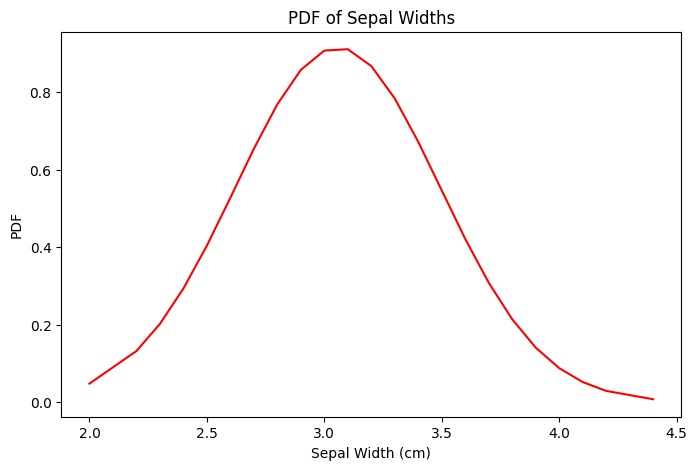

In [19]:
sepal_width = df['sepal width (cm)']
pdf = stats.norm.pdf(sorted(sepal_width), sepal_width.mean(), sepal_width.std())

plt.figure(figsize=(8,5))
plt.plot(sorted(sepal_width), pdf, color="red")
plt.title("PDF of Sepal Widths")
plt.xlabel("Sepal Width (cm)")
plt.ylabel("PDF")
plt.show()

#### The probability density function models sepal width as a normal distribution. Peaks show the most likely values, while tails represent rarer ones. Unlike histograms, the PDF is continuous, letting us estimate probabilities for any given interval.

## Task: Probability Estimation

In [20]:
threshold = 4.5
probability = np.mean(petal_length > threshold)
probability

np.float64(0.42)

#### This calculates the probability of picking a flower with petal length greater than 4.5 cm. It simply counts how many flowers meet the condition and divides by the total. The result shows how common longer petals are in the dataset.

## Task: Hypothesis Testing (t-test)

In [21]:
setosa = df[df['target'] == 0]['petal length (cm)']
versicolor = df[df['target'] == 1]['petal length (cm)']

t_stat, p_val = stats.ttest_ind(setosa, versicolor)
t_stat, p_val

(np.float64(-39.492719391538095), np.float64(5.404910513441677e-62))

#### The t-test checks if mean petal lengths of Setosa and Versicolor differ significantly. A small p-value (typically < 0.05) means the difference is statistically significant. A large p-value means any difference may be due to random chance.

## Task: Covariance & Correlation

In [22]:
covariance = np.cov(df['sepal length (cm)'], df['sepal width (cm)'])[0,1]
correlation = np.corrcoef(df['sepal length (cm)'], df['sepal width (cm)'])[0,1]

covariance, correlation

(np.float64(-0.0424340044742729), np.float64(-0.11756978413300198))

#### Covariance shows whether the two features move together (positive) or oppositely (negative). Correlation standardizes this relationship between -1 and 1. A correlation near 0 means little linear relationship, while near ±1 means a strong one.